In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

#importing rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit import RDConfig
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
#from utility import FeatureGenerator
from rdkit.Chem import PandasTools as PandasTools
from rdkit import DataStructs
from rdkit.Chem.Subshape import SubshapeBuilder,SubshapeAligner,SubshapeObjects

#importing sklearn 
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import pandas as pd


In [2]:
from rdkit.Chem import AllChem
from rdkit import Chem
import pandas as pd



url = "https://github.com/arashtayyebi/Scale-prediction/raw/main/Dataset-Scale.XLSX"

# Load the dataset from the URL
df = pd.read_excel(url)

#df = pd.read_excel('C:/Users/arash.tayyebi/Desktop/scale/data/done/UND Data92.xlsx')

print(df.head)


<bound method NDFrame.head of         pH  ICP_Al  ICP_B  ICP_Ba  ICP_HCO3  ICP_Ca  ICP_Cl  ICP_Cu  ICP_Fe  \
0     6.14   9.385  391.6  17.500   337.233   14970  167428   0.000  204.30   
1     6.24  12.410  510.5  48.130   475.290   18980  154541   0.174  274.00   
2     6.21   4.361  503.2  48.780   518.180   19240  135505   1.125  328.10   
3     6.01  13.150  480.2  46.570   235.950   19890  143779   0.848  162.00   
4     6.07  14.690  478.2  52.260   250.630   20300  147964   0.000  207.20   
...    ...     ...    ...     ...       ...     ...     ...     ...     ...   
2307  5.95  12.890  487.2  17.710   133.800   19990  169050   0.032  231.50   
2308  6.85   5.782  196.5   1.451   241.870    8072  137185   0.418  259.30   
2309  6.08   6.847  246.9   2.071   126.130    9530  159683   0.316   50.23   
2310  5.91  14.110  413.1  15.730   104.311   15050  144237   0.000   59.54   
2311  5.74  11.880  478.5  16.730   122.480   17740  174476   0.000  102.30   

      ICP_K  ...  ICP

In [3]:
Y = df.iloc[:,19:28]
Y

,CaSO4-Anhydrite,CaCO3-Aragonite,BaSO4-Barite,CaCO3-Calcite,SrSO4-Celestite,CaSO4:2H2O-Gypsum,NaCl-Halite,SiO2-Quartz,FeCO3-Siderite
0,-0.37,0.38,1.66,0.52,0.31,-0.16,0.05,2.15,-0.37
1,-0.46,0.69,1.91,0.83,0.37,-0.24,-0.05,2.12,0.11
2,-0.48,0.65,1.91,0.79,0.44,-0.22,-0.31,2.05,0.31
3,-0.35,0.15,1.99,0.29,0.48,-0.11,-0.20,2.20,-0.66
4,-0.32,0.24,2.06,0.38,0.55,-0.08,-0.20,2.47,-0.44
...,...,...,...,...,...,...,...,...,...
2307,-0.28,-0.14,1.62,0.00,0.35,-0.08,0.12,2.31,-0.94
2308,-0.65,0.82,0.60,0.96,0.02,-0.39,-0.28,1.77,0.65
2309,-0.51,-0.18,0.80,-0.04,0.09,-0.29,-0.04,1.97,-2.30
2310,-0.56,-0.37,1.43,-0.22,0.20,-0.32,-0.17,1.88,-1.81


In [3]:
Y = df.iloc[:,24:25]
Y

,CaSO4:2H2O-Gypsum
0,-0.16
1,-0.24
2,-0.22
3,-0.11
4,-0.08
...,...
2307,-0.08
2308,-0.39
2309,-0.29
2310,-0.32


In [4]:
X = df.iloc[:,0:19]
X

,pH,ICP_Al,ICP_B,ICP_Ba,ICP_HCO3,ICP_Ca,ICP_Cl,ICP_Cu,ICP_Fe,ICP_K,ICP_Mg,ICP_Mn,ICP_Na,ICP_Pb,ICP_S,ICP_Sulfate,ICP_Si,ICP_Sr,ICP_Zn
0,6.14,9.385,391.6,17.500,337.233,14970,167428,0.000,204.30,6605,1727.0,13.380,83500,5.745,116.90,350.70,54.21,1089.0,14.850
1,6.24,12.410,510.5,48.130,475.290,18980,154541,0.174,274.00,7847,1315.0,45.840,78390,2.316,79.43,238.29,56.77,1918.0,16.010
2,6.21,4.361,503.2,48.780,518.180,19240,135505,1.125,328.10,7221,1326.0,54.120,65570,3.568,87.84,263.52,67.24,2132.0,18.160
3,6.01,13.150,480.2,46.570,235.950,19890,143779,0.848,162.00,7845,1094.0,18.210,70930,0.000,105.60,316.80,82.03,1866.0,36.820
4,6.07,14.690,478.2,52.260,250.630,20300,147964,0.000,207.20,7763,1130.0,18.920,67630,2.713,108.40,325.20,150.70,2122.0,41.170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307,5.95,12.890,487.2,17.710,133.800,19990,169050,0.032,231.50,7775,1518.0,13.880,84800,8.362,101.60,304.80,66.72,1367.0,35.570
2308,6.85,5.782,196.5,1.451,241.870,8072,137185,0.418,259.30,3787,949.1,5.650,77440,0.767,139.90,419.70,40.34,483.6,3.175
2309,6.08,6.847,246.9,2.071,126.130,9530,159683,0.316,50.23,4546,1211.0,2.868,86000,0.000,141.10,423.30,44.24,539.0,1.437
2310,5.91,14.110,413.1,15.730,104.311,15050,144237,0.000,59.54,5880,1236.0,9.239,78000,0.000,87.43,262.29,40.29,1188.0,1.749


In [5]:
#data split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=991)
#test size is 20% and traing size is 80%
#linear regression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [7]:
#predicts the X_train
Y_pred_train = reg.predict(X_train)
#print('Coefficients:', model.coef_)
#print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Mean squared error (MSE): 0.09
Coefficient of determination (R^2): 0.84


In [8]:
mae_test2 = mean_absolute_error(Y_train, Y_pred_train)
rmse_test2 = np.sqrt(mean_squared_error(Y_train, Y_pred_train))
r2_test2 = r2_score(Y_train, Y_pred_train)

# Print the results
print("MAE (filtered test):", mae_test2)
print("RMSE (filtered test):", rmse_test2)
print("R^2 (filtered test):", r2_test2)

MAE (filtered test): 0.0556867971713276
RMSE (filtered test): 0.1111466932979592
R^2 (filtered test): 0.8398021452387959


In [9]:
#predicts the X_test
Y_pred_test = reg.predict(X_test)
#print('Coefficients:', model.coef_)44444444444
#print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Mean squared error (MSE): 0.10
Coefficient of determination (R^2): 0.82


In [10]:
mae_filtered_test2 = mean_absolute_error(Y_test, Y_pred_test)
rmse_filtered_test2 = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
r2_filtered_test2 = r2_score(Y_test, Y_pred_test)

# Print the results
print("MAE (filtered test):", mae_filtered_test2)
print("RMSE (filtered test):", rmse_filtered_test2)
print("R^2 (filtered test):", r2_filtered_test2)

MAE (filtered test): 0.05746068065207296
RMSE (filtered test): 0.1121617812038104
R^2 (filtered test): 0.8209421157294525


In [6]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

C:\Users\DEDP Grader\AppData\Local\Temp\ipykernel_2228\72191333.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)


RandomForestRegressor(random_state=42)

In [7]:
#predicts the X_train
Y_pred_train = model.predict(X_train)
#print('Coefficients:', model.coef_)
#print('Intercept:', model.intercept_)
print('Mean squared error (RMSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Mean squared error (RMSE): 0.02
Coefficient of determination (R^2): 0.98


In [8]:
mae_test2 = mean_absolute_error(Y_train, Y_pred_train)
rmse_test2 = np.sqrt(mean_squared_error(Y_train, Y_pred_train))
r2_test2 = r2_score(Y_train, Y_pred_train)

# Print the results
print("MAE (filtered test):", mae_test2)
print("RMSE (filtered test):", rmse_test2)
print("R^2 (filtered test):", r2_test2)

MAE (filtered test): 0.005417360735532731
RMSE (filtered test): 0.018576338194722784
R^2 (filtered test): 0.9837288484217392


In [9]:
Y_pred_test = model.predict(X_test)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Mean squared error (MSE): 0.05
Coefficient of determination (R^2): 0.90


In [10]:
mae_filtered_test2 = mean_absolute_error(Y_test, Y_pred_test)
rmse_filtered_test2 = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
r2_filtered_test2 = r2_score(Y_test, Y_pred_test)

# Print the results
print("MAE (filtered test):", mae_filtered_test2)
print("RMSE (filtered test):", rmse_filtered_test2)
print("R^2 (filtered test):", r2_filtered_test2)

MAE (filtered test): 0.015281425485961125
RMSE (filtered test): 0.0454827575142659
R^2 (filtered test): 0.9017417046598811


In [11]:
import shap
from sklearn.preprocessing import StandardScaler
import os
import sys

C:\Users\DEDP Grader\anaconda3\envs\rdkit\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
scaler = StandardScaler()

In [14]:
X = X_test

X2= scaler.fit_transform(X)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X2)

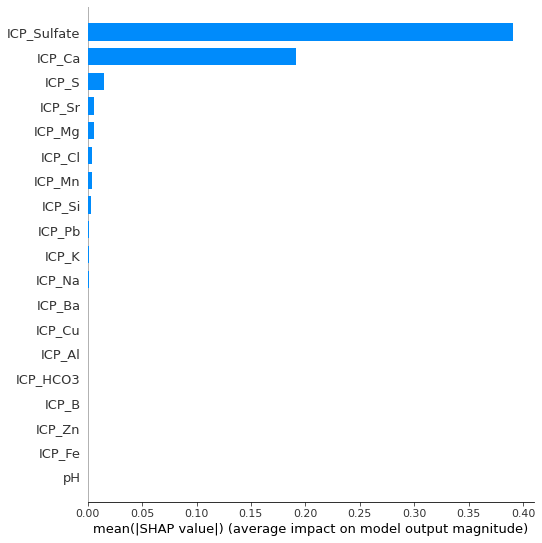

In [15]:
shap.summary_plot(shap_values, X_test, plot_type="bar",show=False,max_display=20,plot_size=0.4) 
#shap.summary_plot(shap_values, max_display=12, plot_type="bar",show=False)
plt.savefig('CaSO4-Gypsum.pdf',bbox_inches='tight',dpi = 1000)

In [6]:
import xgboost as xgb
xgbr = xgb.XGBRegressor(verbosity=1) 
print(xgbr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)


In [7]:
xgbr.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [8]:
Y_pred_test = xgbr.predict(X_test)
print('Mean squared error (RMSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Mean squared error (RMSE): 0.04
Coefficient of determination (R^2): 0.91


In [9]:
#predicts the X_train
Y_pred_train = xgbr.predict(X_train)
#print('Coefficients:', model.coef_)
#print('Intercept:', model.intercept_)
print('Mean squared error (RMSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Mean squared error (RMSE): 0.00
Coefficient of determination (R^2): 1.00


In [10]:
mae_test2 = mean_absolute_error(Y_train, Y_pred_train)
rmse_test2 = np.sqrt(mean_squared_error(Y_train, Y_pred_train))
r2_test2 = r2_score(Y_train, Y_pred_train)

# Print the results
print("MAE (filtered test):", mae_test2)
print("RMSE (filtered test):", rmse_test2)
print("R^2 (filtered test):", r2_test2)

MAE (filtered test): 0.0010862507606437708
RMSE (filtered test): 0.0015203563515597607
R^2 (filtered test): 0.9998910094464541


In [11]:
mae_filtered_test2 = mean_absolute_error(Y_test, Y_pred_test)
rmse_filtered_test2 = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
r2_filtered_test2 = r2_score(Y_test, Y_pred_test)

# Print the results
print("MAE (filtered test):", mae_filtered_test2)
print("RMSE (filtered test):", rmse_filtered_test2)
print("R^2 (filtered test):", r2_filtered_test2)

MAE (filtered test): 0.013917743542551448
RMSE (filtered test): 0.04382996820722119
R^2 (filtered test): 0.908753132833781


In [19]:
import pandas as pd

# Define your column names
columns = ["CaSO4", "CaCO3", "BaSO4", "CaCO3", "SrSO4", "CaSO4:2H2O", "NaCl", "FeS", "SiO2", "FeCO3", "ZnS"]

# Create a DataFrame from ynew with the specified columns
df = pd.DataFrame(ynew, columns=columns)

# Specify the file path where you want to save the Excel file
excel_file_path = "output.xlsx"

# Save the DataFrame to an Excel file
df.to_excel(excel_file_path, index=False)